# Home Assignment: Deep Learning from Scratch
#### Eden Afouri, Noam Siegel

This software was developed for the course Practical Deep Learning, BGU, Fall 2020.

The code lies in `Network.py`, `utils.py`.

### Imports

In [13]:
%matplotlib inline
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from tqdm import tqdm
import seaborn as sns
from network import Network
from utils import plot_gradient_test
# DATASETS_PATH = ['NNdata/SwissRollData.mat',
#                  'NNdata/PeaksData.mat',
#                  'NNdata/GMMData.mat']
DATASETS_PATH = ['NNdata/PeaksData.mat']

# Task 1

We wrote code which computes the objective loss function "soft-max" and its gradient
with respect to $w_j$ and the biases.

In order to verify these functions, we present the results of the Gradient Test.

First, we denote:

$val_1 := |f(x+\epsilon_i d) - f(x)|$

$val_2 := |f(x+\epsilon d) - f(x) - \epsilon d^T
\texttt{grad}(x)|$

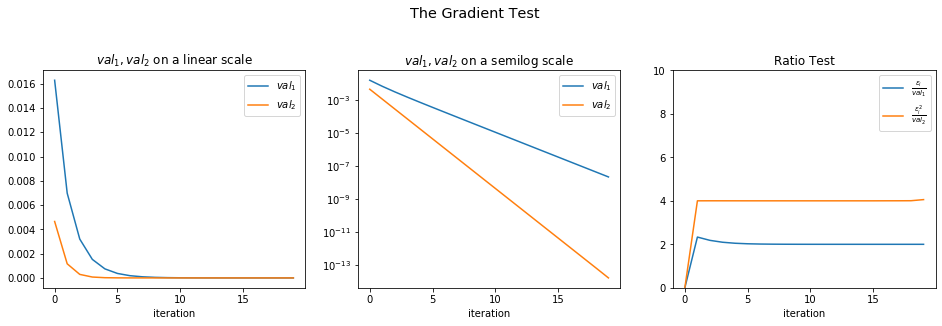

In [8]:
# m: number of samples
# n: input dimension
# l: output dimension
# iterations: number of iterations to run

plot_gradient_test(num_samples=50, input_dimension=3, output_dimension=5, iterations=20)



As we can see,

$|f(x+\epsilon d) - f(x)| = O(\epsilon)$

$|f(x+\epsilon d) - f(x) - \epsilon d^T
\texttt{grad}(x)| = O(\epsilon^2)$

Thus the implementations of the objective function and it's
gradients are correct.



# Parts 2-3
We will now demonstrate the minimization of the softmax function using SGD.
We instantiate a `Network` object with `L=0` layers, and then run SGD on it for
various learning rates and mini-batch sizes.

We chose:


In [6]:
n_learning_rates = 4
n_batch_sizes = 4
learning_rates = np.logspace(-1, -4, n_learning_rates, base=10)
batch_sizes = np.logspace(4, 7, n_batch_sizes, base=2, dtype=int)
print("Learning Rates: {}".format(learning_rates))
print("Mini-Batch Sizes: {}".format(batch_sizes))

Learning Rates: [0.1    0.01   0.001  0.0001]
Mini-Batch Sizes: [ 16  32  64 128]


## Todo: write about our other tries


NNdata/PeaksData.mat:   0%|                                                                     | 0/16 [00:00<?, ?it/s]

(2, 25000)


NNdata/PeaksData.mat: 100%|████████████████████████████████████████████████████████████| 16/16 [01:59<00:00,  7.49s/it]


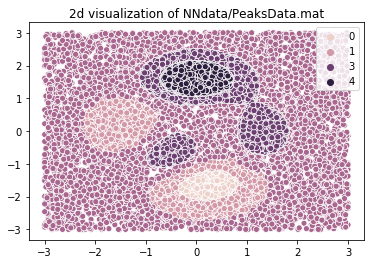

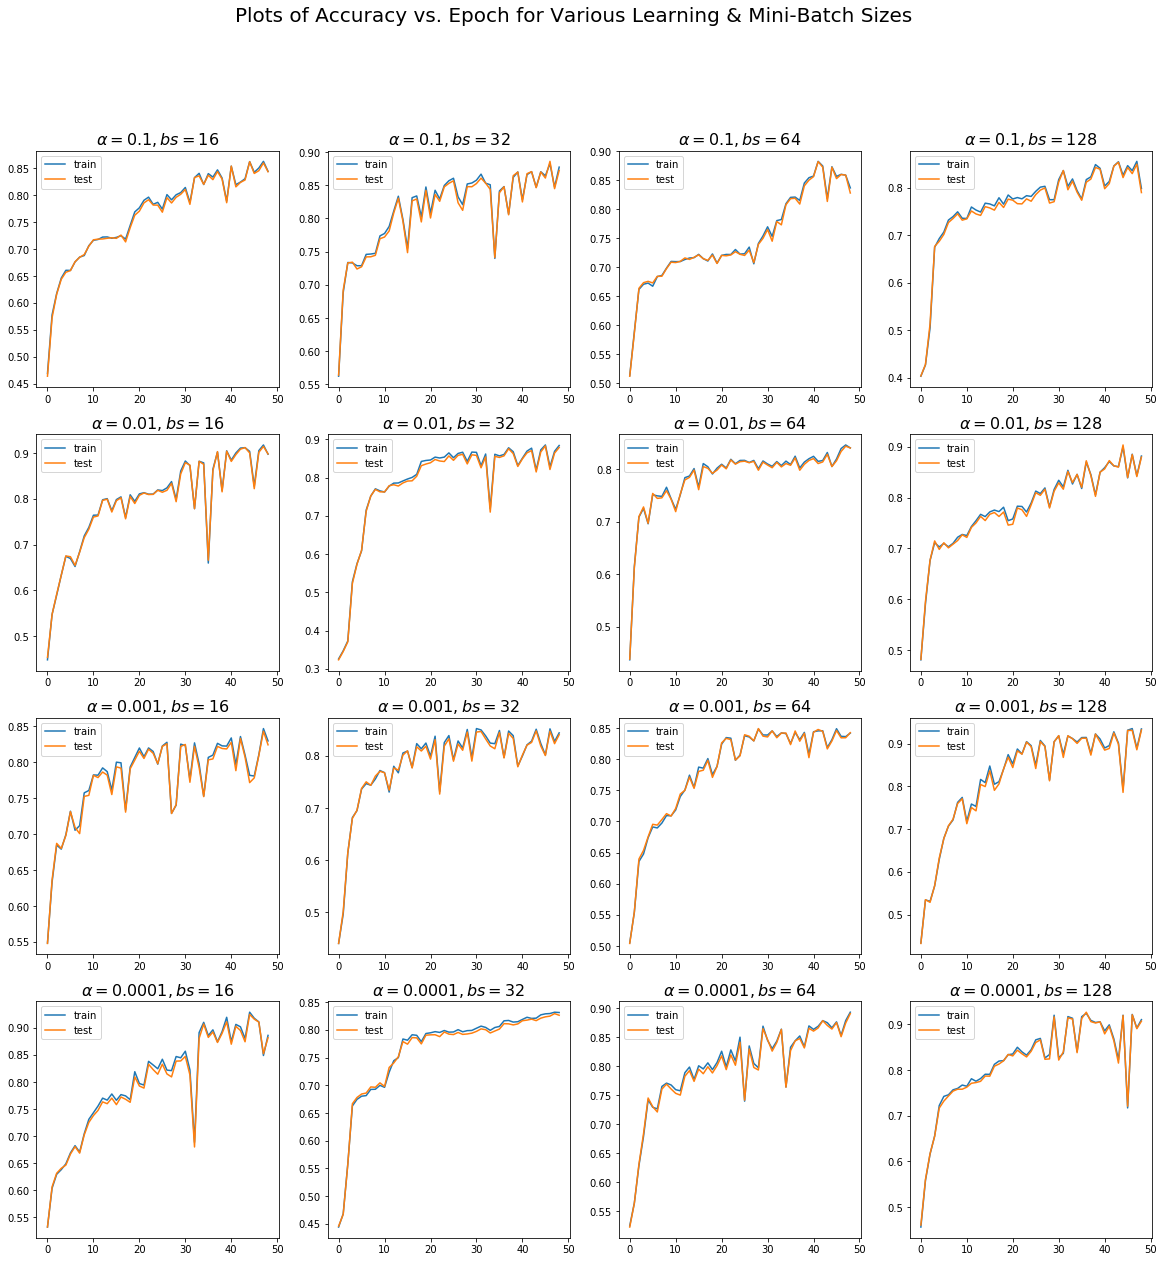

NNdata/GMMData.mat:   0%|                                                                       | 0/16 [00:00<?, ?it/s]

(5, 25000)


NNdata/GMMData.mat: 100%|██████████████████████████████████████████████████████████████| 16/16 [01:50<00:00,  6.88s/it]


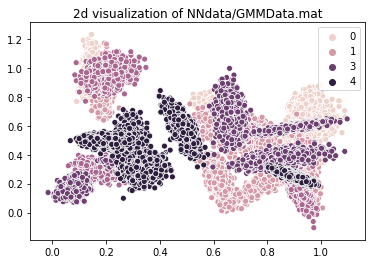

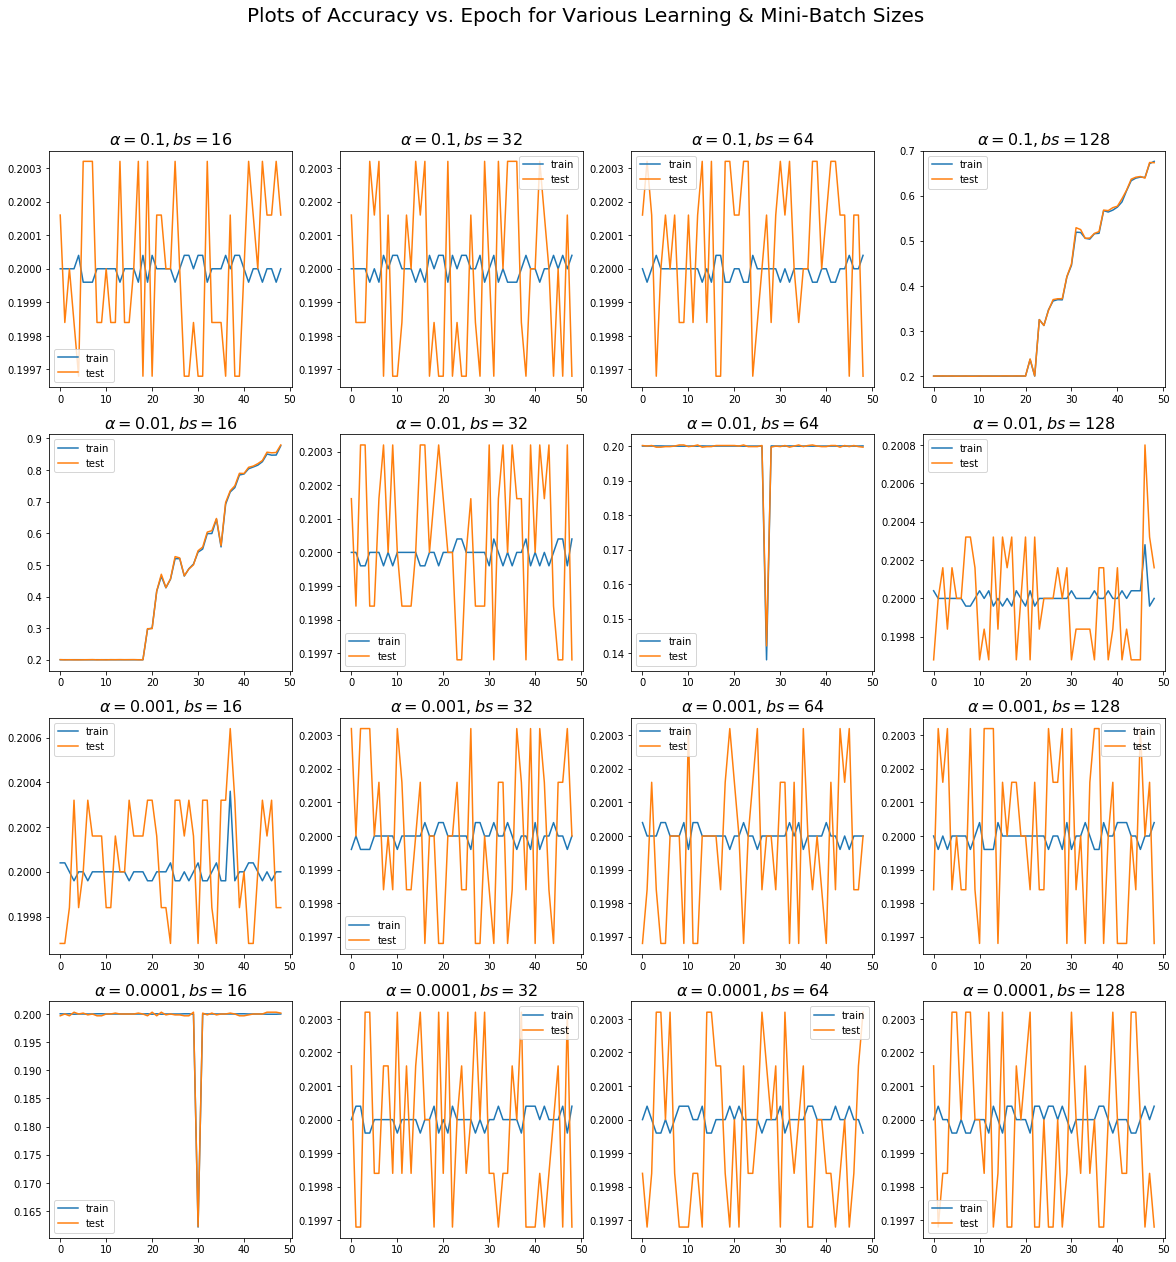

In [12]:

for filename in DATASETS_PATH:
    x = loadmat(filename)
    Xt, Xv, Ct, Cv, = x['Yt'], x['Yv'], x['Ct'], x['Cv']
    print(Xt.shape)
    Y = np.argmax(Ct, axis=0)
    datasets = {'train': (Xt, Ct),
                'test': (Xv, Cv)}

    sns.scatterplot(x=Xt[0], y=Xt[1], hue=Y).set_title("2d visualization of {}".format(filename))

    fig = plt.figure(figsize=(20, 20))
    fig.suptitle("Plots of Accuracy vs. Epoch for Various Learning & Mini-Batch Sizes ".format(filename), fontsize=20)


    for i, (lr, batch_size) in tqdm(enumerate(list(product(learning_rates, batch_sizes))), desc=filename,
                                    total=n_batch_sizes * n_learning_rates):
        input_dimension = Xt.shape[0]
        output_dimension = Ct.shape[0]
        # net = Network(input_dimension, output_dimension, L=0)
        net = Network(input_dimension, output_dimension, hidden_layers_sizes=[4, 6, 5])
        # x_plot, y_plots = net.stochastic_gradient_descent(Xt, Ct, lr, batch_size, num_epochs=100,test_data=datasets)
        x_plot, y_plots = net.train(Xt, Ct,test_data=datasets, score_every_epoch=True, max_epochs=50)
        ax = fig.add_subplot(len(learning_rates), len(batch_sizes), i + 1)
        ax.set_title(r"$\alpha={}, bs={}$".format(lr, batch_size), fontsize=16)
        for ds_name, ds_accuracies in y_plots.items():
            ax.plot(ds_accuracies, label=ds_name)
        ax.legend()
    plt.show()




### Todo: write about the results



# Parts 4-6